In [1]:
from shapely.geometry import MultiPolygon, Polygon

import pandas as pd
import geopandas as gpd
import numpy as np

from matplotlib import pyplot as plt

In [43]:
Node

NameError: name 'Node' is not defined

In [62]:
class Node:
    def __init__(self, left=None, right=None, data:dict = None):
        self.left = left
        self.right = right
        self.data = data
    def __str__(self):
        return f'{type(self)} - {str(self.data)}'
    
class Edge(Node):
    def __init__(self, left = None, right = None, data:dict = None):
        Node.__init__(self, left, right, data)
    def __str__(self):
        return f'{type(self)} - {str(self.data)}'
        

class Vertex:
    def __init__(self, left = None, right = None, data:dict = None):
        Node.__init__(self, left, right, data)
    def __str__(self):
        return Node.__str__(self)

In [63]:
coords = [(0,0), (0,1), (0,2)]
lengths = [1, 2]


vlist = []
elist = []
for length, coor in zip(lengths, coords[:-1]):
    v = Vertex(data={'coor': coor})
    e = Edge(data={'length': length})

    v.right = e
    e.left = v
    
    if len(vlist) > 0:
        elist[-1].right = v
        v.left = elist[-1]
    
    vlist.append(v)
    elist.append(e)
    
for v in vlist:
    print(v)
    
for e in elist:
    print(e.right)

<class '__main__.Vertex'> - {'coor': (0, 0)}
<class '__main__.Vertex'> - {'coor': (0, 1)}
<class '__main__.Vertex'> - {'coor': (0, 1)}
None


<class '__main__.Vertex'>


In [1]:
class Vertex:
    def __init__(self, coor):
        self.x = coor[0]
        self.y = coor[1]
        
        self.left = self
        self.right = self
        
        self.isstart = True
        self.isend = True
        
    def __str__(self):
        print(f'({self.x}, {self.y})')
        
    def add_right(self, vertex: Vertex):
        self.right = vertex
        self.isend = False
        vertex.add_left(self)
        
    def add_left(self, vertex: Vertex):
        self.left = vertex
        self.isstart = False
        
# class PolygonLL:
#     def __init__(self, startcoor):
#         self.N = 1
#         self.start = Coordinate(startcoor)
#         self.start.set_neighbors(self.start, self.start)
        
#     def add_
        
        
    

NameError: name 'Vertex' is not defined

In [2]:
# def calculate_perimeters(weather: dict, ignition: Perimeter, ):
#     '''
#         weather: a dict item that keeps all the information from the weather station (Consider changing to a custom object)
#         ignition: A polygon to start the Farsite ignitions from
#     '''
#     # Calculate 

def count_added_vertices(polygon, Ncoords):
    coords = polygon.exterior.coords
    
    x = coords.xy[0].tolist()
    y = coords.xy[1].tolist()
    
    segment_size = np.sqrt(np.diff(x)**2 + np.diff(x)**2)
    total = segment_size.sum()
    new_segment_size = total/(Ncoords - len(x[1:]))
    
    new_points_count = []
    atix = 0
    new_coords_x = [x[atix]]
    new_coords_y = [y[atix]]
    
    current_drawn = 0
    remaining_segment = segment_size[0]
    
    for ix in range(Ncoords):
        rhat_x = x[atix+1] - x[atix]
        rhat_y = y[atix+1] - y[atix]
        
        xtest = new_coords_x[-1] + new_segment_size
        ytest = new_coords_y[-1] + new_segment_size
        
        distance_test = np.sqrt((xtest-x[atix])**2 + (ytest-y[atix])**2)
        
        if distance_test > segment_size[atix]: # can't add point
            new_coords_x.append(x[atix+1])
            new_coords_y.append(y[atix+1])
            
            # Add remaining as well
            remaining = distance_test - segment_size[atix]
            atix += 1
            rhat_x = x[atix+1] - x[atix]
            rhat_y = y[atix+1] - y[atix]
            
        else: # Add an intermediate point
            new_coords_x.append(xtest)
            new_coords_y.append(ytest)
    
    return zip(new_coords_x, new_coords_y)

def recalculate_polygon(polygon, Ncoords):
    # Recalculates the given polygon coordinates based on an interpolation.

    # Skips every len(coords)/Ncoords
    coords = polygon.exterior.coords
    if Ncoords > len(coords):
        x = coords.xy[0].tolist()
        y = coords.xy[1].tolist()
        
        # Periodic boundary conditions for calculating the diff
        xnew = x[-1] + x
        ynew = y[-1] + y
        
        # Calculate the length of each segment
        segment_size = np.sqrt(np.diff(xnew)**2 + np.diff(ynew)**2)
        new_segment_size = segment_size.sum()/Ncoords
        
    else:
        delta = len(coords)/Ncoords
        new_coords = []
        for ix in range(Ncoords):
            new_coords.append(coords[int(delta*ix)])

        return Polygon(shell=new_coords)

def smooth_polygon(polygon, kernel_size=11):
    
    if kernel_size%2 == 0:
        print(f'kernel size={kernel_size} needs to be an odd integer!')
        return None
    
    kernel = np.ones(kernel_size)
    
    x = polygon.exterior.coords.xy[0].tolist()
    y = polygon.exterior.coords.xy[1].tolist()
    
    # Add half of the kernel to the beginning and the end.
    xnew = x[int(-(kernel_size-1)/2-0.1):] + x + x[:int((kernel_size-1)/2+0.1)]
    ynew = y[int(-(kernel_size-1)/2-0.1):] + y + y[:int((kernel_size-1)/2+0.1)]
    
    xsmooth = np.convolve(xnew, kernel, mode='valid')/kernel_size
    ysmooth = np.convolve(ynew, kernel, mode='valid')/kernel_size
    
    return Polygon(shell=zip(xsmooth, ysmooth))

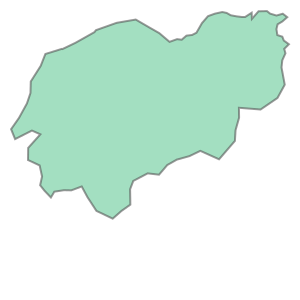

In [19]:
mariasim = pd.read_pickle('./Maria2019_simulation_new.pkl')
ignitions = pd.read_pickle('../../data/test_table.pkl')

indices = ['caf837e84ff048e4aea8f4c3429c3ebb', 'c15f24ab33aa4f4e9f0c2ecbeb65fb5a']
firstgeom = mariasim.loc[indices[0], 'geometry']
secondgeom = mariasim.loc[indices[1], 'geometry'][0]

firstgeom_compare = gpd.read_file(ignitions.loc[mariasim.loc[indices[0], 'compareidx'], 'filepath'])['geometry'][0]
secondgeom_compare = gpd.read_file(ignitions.loc[mariasim.loc[indices[1], 'compareidx'], 'filepath'])['geometry'][0]

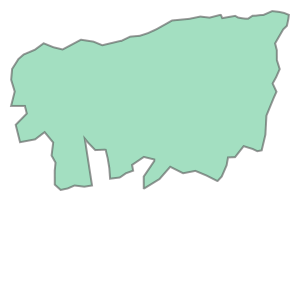

In [37]:
compareidx = mariasim['compareidx'].unique()
gpd.read_file(ignitions.loc[compareidx[2], 'filepath'])['geometry'][0]

2300

In [92]:
x = firstgeom.exterior.coords.xy[0].tolist()
y = firstgeom.exterior.coords.xy[1].tolist()

np.ones(10)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [96]:
kernel_size = 11
-(kernel_size-1)/2:

-5.0

In [118]:
firstgeom_smooth = smooth_polygon(firstgeom,25)

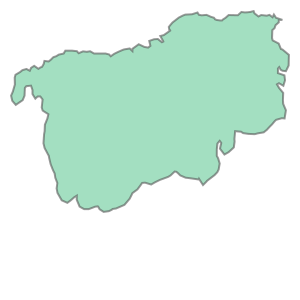

In [130]:
recalculate_polygon(firstgeom, 233)

In [149]:
len(coords)

391

In [169]:
Ncoords = 600

coords = firstgeom.exterior.coords
x = coords.xy[0].tolist()
y = coords.xy[1].tolist()

# Periodic boundary conditions for calculating the diff

# Calculate the length of each segment
segment_size = np.sqrt(np.diff(x)**2 + np.diff(y)**2)
new_segment_size = segment_size.sum()/Ncoords

new_segment_size

20.442069391365706

In [170]:
xrecalculated = [x[0]]
yrecalculated = [y[0]]

xfrom = x[0]
xto = x[1]
yfrom = y[0]
yto = y[1]
for i in range(Ncoords):
    rhat_x = (x[fromix+1]-x[fromix])/segment_size[fromix]
    rhat_y = (y[fromix+1]-y[fromix])/segment_size[fromix]
    
    xtest = xrecalculated[-1] + new_segment_size*rhat_x
    ytest = yrecalculated[-1] + new_segment_size*rhat_y
    
    lengthtest = np.sqrt((ytest - y[fromix])**2 + (xtest - x[fromix])**2)
    if lengthtest < segment_size[fromix]:
        xrecalculated.append(xtest)
        yrecalculated.append(ytest)
    else:
        fromix += 1
        

In [179]:

segment_size[fromix]

51.07837115211712